In [9]:
!jupyter nbconvert Week3_T1.ipynb --to slides --post serve

[NbConvertApp] Converting notebook Week3_T1.ipynb to slides
[NbConvertApp] Writing 673455 bytes to Week3_T1.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Week3_T1.slides.html
Use Control-C to stop this server
^C

Interrupted


In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
from  sklearn import linear_model
import matplotlib.pyplot as plt

# AML W3: evaluatie

> Hoe goed is je geleerde model?

### topics

1. Evaluatiematen
2. baselines
3. Optimalisatie/loss functies
4. Cross validatie en grid search
5. Significantie toetsen

### Stof

* Chapter 5 Introduction to Machine Learning with Python
    * Hoeft niet: 5.3.5, 5.2 tot aan bladzijde 274.
* [RMSE, $R^2$,95% confidence intervals](https://www.coursera.org/lecture/wharton-quantitative-modeling/4-4-r-squared-and-root-mean-squared-error-rmse-Nndhc)
* [$R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination)
* [baseline models](https://crunchingthedata.com/baseline-models-for-machine-learning/)
* (Extra) Als je ons soort performance evaluatie in een breder, ook toegepast, evaluatie traject wilt zien is [deze post](https://crunchingthedata.com/machine-learning-model-evaluation/) ontzettend nuttig.

# To start: train, (validate), test set.

* In de **Evaluatie** kijk je hoe goed je geleerde (getrainde) model **generaliseert** naar nieuwe voorbeelden.
* Je moet dus niet gaan testen op voorbeelden die je al gezien hebt.
    * waarop je getraind hebt.
* Waarom eigenlijk niet?

## Partitie

* Je deelt je verzameling gelabelde voorbeelden dus op in een **niet overlappende** train en test set.

## Om hyperparameters te "tunen": validatieset

* Kan je ook nog een derde set, een validatieset, maken.
* Ook weer *disjoint* van de andere twee.
    * Je leert op de train-set met bepaalde waardes op hyperparameters
    * test op de validatieset
    * en doet dit weer met andere waardes voor de hyperparameters,
    * enzovoort
* uiteindelijk test je (het model met de best presterende hyperparameters) op je (nog nooit geziene) testset, 
* en die waardes rapporteer je. 

# Evaluate a classifier

* Measures based on a **confusion matrix**

![](../img/conf_matrix.png)

* neem over opp bord
* maak rij en kolom totalen
* geef de namen TP, FP, etc
* maak extra kolom voor de recall en extra kolom voor de precisie, en bereken per classe

# From [wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)


* Wat zijn de verschillen met de vorige confusion table?

<table class="wikitable" style="border:none; background:transparent; text-align:center;" align="center">
<tbody><tr>
<td rowspan="2" style="border:none;">
</td>
<td style="border:none;">
</td>
<td colspan="2" style="background:#bbeeee;"><b>Predicted condition</b>
</td></tr>
<tr>
<td style="background:#eeeeee;"><a href="/wiki/Statistical_population" title="Statistical population">Total population</a> <br><span style="white-space:nowrap;">= P + N</span>
</td>
<td style="background:#ccffff;"><b>Positive (PP)</b>
</td>
<td style="background:#aadddd;"><b>Negative (PN)</b>
</td></tr>
<tr>
<td rowspan="2" class="nowrap unsortable" style="line-height:99%;vertical-align:middle;padding:.4em .4em .2em;background-position:50% .4em !important;min-width:0.875em;max-width:0.875em;width:0.875em;overflow:hidden;background:#eeeebb;"><div style="vertical-rl=-webkit-writing-mode: vertical-rl; -o-writing-mode: vertical-rl; -ms-writing-mode: tb-rl;writing-mode: tb-rl; writing-mode: vertical-rl; layout-flow: vertical-ideographic;transform:rotate(180deg);display:inline-block;padding-left:1px;text-align:center;"><b>Actual condition</b></div>
</td>
<td style="background:#ffffcc;"><b>Positive (P)</b>
</td>
<td style="background:#ccffcc;"><b><a href="/wiki/True_positive" class="mw-redirect" title="True positive">True positive</a> (TP) <br></b>
</td>
<td style="background:#ffdddd;"><b><a href="/wiki/False_negative" class="mw-redirect" title="False negative">False negative</a> (FN) <br></b>
</td></tr>
<tr>
<td style="background:#ddddaa;"><b>Negative (N)</b>
</td>
<td style="background:#ffcccc;"><b><a href="/wiki/False_positive" class="mw-redirect" title="False positive">False positive</a> (FP) <br></b>
</td>
<td style="background:#bbeebb;"><b><a href="/wiki/True_negative" class="mw-redirect" title="True negative">True negative</a> (TN) <br></b>
</td></tr>
<tr>
<td colspan="4" style="border:none;"><sup>Sources: </sup><sup id="cite_ref-13" class="reference"><a href="#cite_note-13">[13]</a></sup><sup id="cite_ref-14" class="reference"><a href="#cite_note-14">[14]</a></sup><sup id="cite_ref-15" class="reference"><a href="#cite_note-15">[15]</a></sup><sup id="cite_ref-16" class="reference"><a href="#cite_note-16">[16]</a></sup><sup id="cite_ref-17" class="reference"><a href="#cite_note-17">[17]</a></sup><sup id="cite_ref-18" class="reference"><a href="#cite_note-18">[18]</a></sup><sup id="cite_ref-19" class="reference"><a href="#cite_note-19">[19]</a></sup><sup id="cite_ref-20" class="reference"><a href="#cite_note-20">[20]</a></sup>
</td></tr></tbody></table>
 

# zoek de verschillen
<table>
    <tr><td><img src='../img/conf_matrix.png' width='.3'/></td>
        <td>
<table class="wikitable" style="border:none; background:transparent; text-align:center;" align="center">
<tbody><tr>
<td rowspan="2" style="border:none;">
</td>
<td style="border:none;">
</td>
<td colspan="2" style="background:#bbeeee;"><b>Predicted condition</b>
</td></tr>
<tr>
<td style="background:#eeeeee;"><a href="/wiki/Statistical_population" title="Statistical population">Total population</a> <br><span style="white-space:nowrap;">= P + N</span>
</td>
<td style="background:#ccffff;"><b>Positive (PP)</b>
</td>
<td style="background:#aadddd;"><b>Negative (PN)</b>
</td></tr>
<tr>
<td rowspan="2" class="nowrap unsortable" style="line-height:99%;vertical-align:middle;padding:.4em .4em .2em;background-position:50% .4em !important;min-width:0.875em;max-width:0.875em;width:0.875em;overflow:hidden;background:#eeeebb;"><div style="vertical-rl=-webkit-writing-mode: vertical-rl; -o-writing-mode: vertical-rl; -ms-writing-mode: tb-rl;writing-mode: tb-rl; writing-mode: vertical-rl; layout-flow: vertical-ideographic;transform:rotate(180deg);display:inline-block;padding-left:1px;text-align:center;"><b>Actual condition</b></div>
</td>
<td style="background:#ffffcc;"><b>Positive (P)</b>
</td>
<td style="background:#ccffcc;"><b><a href="/wiki/True_positive" class="mw-redirect" title="True positive">True positive</a> (TP) <br></b>
</td>
<td style="background:#ffdddd;"><b><a href="/wiki/False_negative" class="mw-redirect" title="False negative">False negative</a> (FN) <br></b>
</td></tr>
<tr>
<td style="background:#ddddaa;"><b>Negative (N)</b>
</td>
<td style="background:#ffcccc;"><b><a href="/wiki/False_positive" class="mw-redirect" title="False positive">False positive</a> (FP) <br></b>
</td>
<td style="background:#bbeebb;"><b><a href="/wiki/True_negative" class="mw-redirect" title="True negative">True negative</a> (TN) <br></b>
</td></tr>
<tr>
<td colspan="4" style="border:none;"><sup>Sources: </sup><sup id="cite_ref-13" class="reference"><a href="#cite_note-13">[13]</a></sup><sup id="cite_ref-14" class="reference"><a href="#cite_note-14">[14]</a></sup><sup id="cite_ref-15" class="reference"><a href="#cite_note-15">[15]</a></sup><sup id="cite_ref-16" class="reference"><a href="#cite_note-16">[16]</a></sup><sup id="cite_ref-17" class="reference"><a href="#cite_note-17">[17]</a></sup><sup id="cite_ref-18" class="reference"><a href="#cite_note-18">[18]</a></sup><sup id="cite_ref-19" class="reference"><a href="#cite_note-19">[19]</a></sup><sup id="cite_ref-20" class="reference"><a href="#cite_note-20">[20]</a></sup>
</td></tr></tbody></table>
        </td>
    </tr>
    
    
</table>    

## Short recap on Precision and recall


Given a class $C$:
* Precision= how many of the predictions for class $C$  were correct
* Recall= how many  instances of class $C$ were predicted to be $C$
* Accuracy= how many of all predictions were correct

### In de confusion matrix

**(de fruit-style: met de voorspelling op de rijen)**

* Precisie = rij-totalen/diagonaal
* Recall= kolom-totalen/diagonaal
* accuracy= diagonaal.sum()/totaal

## Example
There is a test for a disease which has _an accuracy of 95%_. The disease occurs in one in every 100 persons.
This accuracy means that the test is 95% reliable: 
* in 95% of cases of people who really have the disease, a positive result is returned, 
* and in 95% of cases of people who do not have the disease, a negative result is obtained.

 

### Questions

1. What is the probability that a person has the disease if the test is positive?
    * This is called the _precision_ of the test.
2. What is the probability that a person with the disease tests positive?
    * This is called the _recall_ of the test.

#### Answers

1. **Recall** This is given because that is $TP/(TP+FN)$ = how many of the "true class" (those with the disease) are picked up by th etest. That is .95.
2. **Precision** This is $TP/(TP+FP)$, how many of those with a positive test do have the disease?

* Let's calculate with an example. Say N=10.000.


|  |*has disease*| *no disease* | |
| -|-: |-: |-: |
|positive test| ...3... |...6...| ...7... 
|negative test|...4... | ...5... |...8...
|             |...1...| ...2....|10.000 

|  |*has disease*| *no disease* | |
| -|-: |-: |-: |
|positive test| 95 |495 | 590
|negative test| 5| 9405|9410
|             |100| 9900|10.000 

* So then Precision = $95/(95+495)= .16$.

#### Direct calculation

* Let's calculate directly with the probabilities (using Bayes rule).
    1. We want P(has disease|test positive). 
    2. This is equal to P(has disease , test positive) / P(test positive).
    3. P(has disease , test positive) is simpy P(has disease) * P(test positive | has disease). Thus $.01* .95$.
    4. What is P(test positive)?
        * Two cases: you have the disease or you have not.
        * Thus  P(test positive) = P(test positive, has disease ) + P(test positive, not has disease )
            * P(test positive, not has disease ) = .99 * .05  
        * Thus P(test positive) = $ (.01* .95) + (.99 * .05 )$
    5. Thus precision = $(.01* .95) / ((.01* .95) + (.99 * .05 )) = .16$
    
  

  
### Accuracy, precision, recall

* So we have an accuracy of .95, a recall of .95 but only a precision of .16. 
* So in order to catch .95 of all diseases with our test, we must have 84% "false accusations".
* Let's imagine a spam filter with these numbers. Here Test=positive then means:  _email is genuine_.
    * Then with 10K mails of which 99% is spam we have 
        * 590 mails in our mailbox (of which 495 are spam).  (pretty low precision)
        * 5 genuine mails in our spam box.  (but high recall)

        
### Why and when accuracy (or reliability) does not say much

* With heavily skewed distributions (like with our disease, only 1% has it)
* you can get high reliability by the law of large numbers on the False class.
    * every time you correctly predict someone does not have the disease this is good for accuracy.
    * So saying that no one has the disease gives an accuracy of .99. 
        * But a precision of 0 and a recall of 0 too. 
        * (actually, precision for the has disease class is then undefined, $0/0$.)
        

# P, R and F1 

Given a class $C$:
* Precision= how many of the predictions for class $C$  were correct
* Recall= how many  instances of class $C$ predicted to be $C$
* Accuracy= how many of all predictions were correct

###  Formulate it using probabilities and priors
$$Precision(C) = \frac{P(True_C, Predicted_C)}{P(Predicted_C)}$$

$$Recall(C) = \frac{P(True_C, Predicted_C)}{P(True_C)}$$

$$F1(C) = \frac{P(True_C, Predicted_C)}{mean(P(Predicted_C), P(True_C)) }$$

### F1 is the harmonic mean of precision and recall

$$ P= \frac{TP}{TP+ FP}\hspace{1cm}  R= \frac{TP}{TP+ FN} \hspace{1cm}   F1= \frac{TP}{TP+ \frac{1}{2}(FP+FN)}$$

# P, R and F1 with multiple classes

1. Compute P,R,F1 for each class.
2. Combine these into a measure for all classes
    * 3 ways of taking the mean

### Macro mean

* take the mean over the measures for each class
    * each class is equal
    * small classes (with bad behaviour) count a lot
    
    

### Weighted mean

* Say 3 classes A, B , C with .7, .2, .1 distribution of the true class
* then weighted mean $R$ecall is 
$$ .7\cdot R(A) + .2\cdot R(B) + .1\cdot R(C)$$

### Micro mean

$$ \frac{diagonal}{diagonal + \mbox{off-diagonal}} = \frac{diagonal}{all}$$

* Accuracy = micro P = micro R = micro F1

# Confusion Matrix with multiple classes


* example  with 3 classes, N=1000
    * priors 700,200,100
    * diagonal : 600,50,10
    * predicted classes: 900,80,20
    
* Compute, accuracy, macro values, weighted values

              precision    recall  f1-score   support

         Cat      0.308     0.667     0.421         6
        Fish      0.667     0.200     0.308        10
         Hen      0.667     0.667     0.667         9

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25



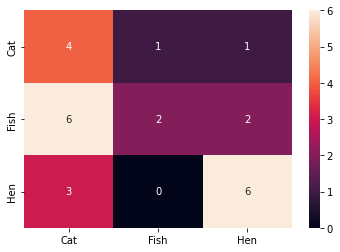

In [6]:
from sklearn import metrics

# Constants
C="Cat"
F="Fish"
H="Hen"

# True values
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# Predicted values
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

# Print the confusion matrix
import seaborn as sns
%matplotlib inline
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True,
           xticklabels=[C,F,H],yticklabels=[C,F,H] );

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

# let op de confusion matrix

* waar staan de true values en waar de predicted?

# Baselines


### Your problem if you have to convince your manager/examiner/friend/....
* Suppose you have trained a classifier and it has accuracy $A$.
    * Is that good?
    * How to assess that?
    

* **Compare to a baseline!**

* Baseline? 
    * Often: a classifier "learned" using only **global** information
        * That is, the distribution of the classes over the population.
    * Your classifier is only based on  "prejudice"
    * It does not use any feature of an instance

# 3 Baselines

## Majority class

* Always choose the majority class

## Random 

* With $C$ classes, let each class have $\frac{1}{C}$ chance.

## Weighted Random 

*  Let each class have $P(C)$ chance.
    * $P(C)$ = fraction of C-instances in the population.

# Example

* 3 classes, A, B, C, with .7, .2 , .1 fractions.

### Majority
* always A
* Accuracy= .7

### Random
* with one third choose each class.
* Accuracy = $.33\cdot .7  + .33\cdot .2 + .33\cdot .1$
* = 1/3

### Weighted Random

* Accuracy = $.7\cdot .7  + .2\cdot .2 + .1\cdot .1$
* = .539

In [7]:
rw= .7**2 + .2**2 + .1**2
rw

0.5399999999999999

# Always compare your model to baselines

* It really schould do better than weighted random, and, if accuracy is all you go for, even better than majority.
* Note that majority scores bad on "diversity"
    * Recall is 1 for majority class, 0 for all others
    * Precision is P(C) for majority class C, not even defined for all others.
    * Macro recall = 1/#C, (with #C:   number of classes) Macro precision even less, so macro F1 as well.
    
### Scikit learn has these baselines

* <https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html>

# Waar zijn we?

### topics

1. ~~Evaluatiematen~~
2. ~~baselines~~
3. Optimalisatie/loss functies
4. Cross validatie en grid search
5. Significantie toetsen

# Evaluatie regressie

* Root mean squared error
* R squared, $R^2$

![](https://miro.medium.com/max/611/1*jopCO2kMEI84s6fiGKdXqg.png)

## formules

### RMSE

* neem alle errors (ook wel 'residuals' genoemd)
* kwadrateer ze
    * maakt niet uit of ze onder of boven de lijn liggen (verschil pos of neg is)
    * grote verschillen worden "uitvergroot"/extra bestraft.
* neem het gemiddelde daarvan
* en trek weer de wortel
    * dan ben je weer in de eenheid waar je in begon
* Error maat: dus hoe lager hoe beter.

### $R^2$ *verklaarde variantie*

*  een maat voor het deel van de variabiliteit dat wordt verklaard door het statistisch model.
* getal tussen 0 en 1, of percentage. 
* Hoe hoger hoe beter.

# $R^2$ verklaarde variantie

### Notatie

* $y$ is de vector met true waardes
* $\bar{y}$ is het gemiddelde over alle waardes in $y$
* $\hat{y}$ is de vector met voorspelde waardes (even lang als $y$).

### concepten

* Variantie van $y$,   SST,  
$$\sum(y_i-\bar{y})^2$$
* SSR, sum of residuals
$$\sum(\hat{y}_i-{y}_i)^2$$

## $R^2$ is nu 

$$ R^2=1- \frac{SSR}{SST} = 1 - \frac{\sum(\hat{y}_i-{y}_i)^2}{\sum(y_i-\bar{y})^2}$$

# Alternatief

### concepten

* Variantie van $y$,   SST,  
$$\sum(y_i-\bar{y})^2$$
* SSR, sum of residuals
$$\sum(\hat{y}_i-{y}_i)^2$$
* SSE, sum of squares explained, SSE
$$\sum(\hat{y}_i-\bar{y})^2$$

## $R^2$ is nu  (met 1 verklarende variabele)

$$ R^2= \frac{SSE}{SST}= 1- \frac{SSR}{SST}  $$


### En met $n$:

$$ R^2= \frac{SSE/n}{SST/n}$$


# Baseline voor regressie

## wat is een goede keus?

* mean of mediaan
* rechte lijn, altijd hetzelfde.

# Wat is de $R^2$ en wat de RMSE van de mean baseline.?

 

$$ R^2= \frac{SSE/n}{SST/n} = \frac{\sum(\hat{y}_i-\bar{y})^2/n}{\sum(y_i-\bar{y})^2/n}=\ldots$$

* En de RMSE?

$$ SE =  \sum(y-\hat{y})^2  =  \sum(y-\bar{y})^2 =  SST$$

### de MSE

* is dan de gemiddelde gekwadrateerde afstand tot het gemiddelde
* en dat noemen we de variantie!

### dus de RMSE is 

* de wortel van de variantie, en dat noemen we de std.

$$ RMSE = \sqrt{\frac{SST}{n}}$$

# Waar zijn we?

### topics

1. ~~Evaluatiematen~~
2. ~~baselines~~
3. Optimalisatie/loss functies
4. Cross validatie en grid search
5. Significantie toetsen

# Optimalisatie/loss functies


* Behandelen we uitgebreid in Week7, neurale netwerken.
* Bij OLS regressie is de loss functie de SSE, de som van gekwadrateerde fouten.
* **We kiezen die regressie lijn waarbij die som zo laag mogelijk is.**
* We willen de *loss* altijd  **minimaliseren**

### Supervised ML en loss

* Je leert een model waarbij de loss op de train voorbeelden minimaal is.

### Maar .....

* Vaak is de echte loss functie een combinatie van 
    * *error* (het verschil tussne echte en voorspelde waardes)
    * *regularisatie* (manier om de generalisatie van het model te bevorderen)

# Waar zijn we?

### topics

1. ~~Evaluatiematen~~
2. ~~baselines~~
3. ~~Optimalisatie/loss functies~~
4. Cross validatie en grid search
5. Significantie toetsen

# Cross validatie en grid search

* **Grid search** is een gestructureerde manier om een hele hoop combinaties van mogelijke hyperparameters uit te proberen.
    * het grid bestaat uit al die combinaties
    * je zoekt naar die combinatie met de beste prestatie.
    
### Crossvalidatie

* Manier om 
    * meer robuuste schatting van prestatie te krijgen
    * meer van je dure gelabelde voorbeelden voor training te kunnen gebruiken
    * een idee van de spreiding (confidence interval) van je kwaliteitsmaat te krijgen
* K-fold cross validation
    * Je trained en evalueert  $k$ keer je model, steeds op andere test en train sets.
    * Dan heb je dus $k$ metrics.

# Cross validatie

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/2560px-K-fold_cross_validation_EN.svg.png)

# Cross validatie pas op

* Neem de test sets niet te klein, zeker met multi class classificatie
* Kijk altijd naar het box-plot van de waardes, niet alleen naar het gemiddelde
* je wilt dat ze eigenlijk erg dicht bij elkaar liggen.

## 95 % confidence interval

* Bereken het gemiddelde en de standaard deviatie over de $k$ gevonden metrics.
* Gebruik dan de gebruikelijke formule (met aanname dat de $k$ gevonden merics normaal verdeeld zijn):

$$  \mu \pm \frac{\sigma}{\sqrt{k}} $$

# Significantie toetsen

* kan op allerlei manieren, jullie kennen vast al T-toetsen

###  De kern-vraag

* Ik zie 0,... verschil in RMSE of F1 score tussen methode A en B, gemeten op deze testset.
* Is dat een **echt verschil**? 
* Of kan het aan  **toeval** worden toegeschreven?

### Simpele oplossing:

* geef 95% confidence intervals bij elke maat die je rapporteert.
* overlappen die niet, dan kan je rustig zeggen dat het verschil **echt is**.

# RMSE en confidence intervals

* Wordt heel goed uitgelegd in [deze video](https://www.coursera.org/lecture/wharton-quantitative-modeling/4-4-r-squared-and-root-mean-squared-error-rmse-Nndhc)

#### Idee: maak een schatting van waar de regressie lijn nou ligt met 95 % zekerheid.

* Neem aan dat 
    1. de fouten  (*residuals*) overal *normaal verdeeld* zijn.
    2. met uniforme standard deviatie overal
* Vuistregel is dan: waarde ligt met ruwweg 95% zekerheid in *voorspelling* $\pm 2\cdot RMSE$.
* je kan dat gebruiken om in je *regressieplot* die 95% betrouwbaarheids band te tekenen.


## code to really compute it

```
sum_errs = np.sum((y_test - y_pred)**2)
stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs) # net anders dan de RMSE, let op degrees of freedom
#get interval from standard deviation
z_score = stats.norm.ppf(1 - ((1-.95) / 2))  # .95 conf int returns 1.96
interval = z_score * stdev
``` 

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


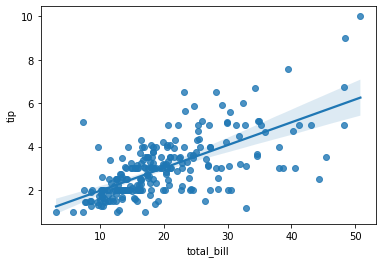

In [8]:
tips = sns.load_dataset('tips')
print(tips.shape)
sns.regplot(x='total_bill', y='tip', data=tips);
tips.head(2)

# Cijfers achter de komma

* P, R en F1  en ook $R^2$ zijn maten tussen 0 en 1.
* `sklearn` geeft die met liefde terug met 7 cijfers achter de komma.
* **Moet je die allemaal laten zien?** 

<center><h1>NEE!</h1></center>

* Ja, maar hoeveel dan wel? 2,3,4?
* En als ik het nou als percentage geef, mag ik dan wel 2 cijfers achter de komma?

### Vuistregel: kom niet naief over 

* veel cijfers achter de komma suggeren een heel grote precisie in je meting.
* maar heb je die echt wel?

### Oplossing: je 95% c.i.

* Als jij een F1 hebt van .634892 met een c.i. van .06...
* dan betekent het dat jou F1 score met 95% zekerheid ergens tussen .694 en .574 ligt. 
* dus je vertelt dan gewoon $.63\pm.06$.

# Wrap up

* Evaluatie is key in ML
    * zowel voor ontwikkelen (hyperparameter tuning), als keuze van modellen
* Daarom splitsen we gelabelde data altijd in train, (validatie), test 
    * en **gebruiken test zo weinig mogelijk**.
* RMSE en $R^2$ voor regressie, 
* maten gebaseerd op confusion matrix voor classificatie.
* Bepaal altijd een "rule based" niet-geleerde baseline, en vergelijk.
* Wees je bewust van schijn-verschillen en van schijn-precisie.
* K-fold Cross Validatie is vaak erg nuttig en geeft inzicht.


### Hint

* Die Marx vindt evaluatie echt heel belangrijk, hij zou er best eens wat tentamenvragen over kunnen stellen.